# Moneyball - Baseball Dataset

URL: https://www.openml.org/d/41021

## Content

1) [Data preprocessing](#dataproc)

2) [Model training](#train)
    
2.a) [Linear regression](#linear)

2.b) [Lasso Regression](#lasso)

2.c) [Random Forest](#rf)

2.d) [kNN](#knn)

3) Evaluation

---

In [55]:
# Basic imports
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# models for linear regression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# models for Lasso regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# statistic tools
from sklearn import metrics
from statistics import stdev

# preprocessing
from sklearn import preprocessing

---

<a id='dataproc'></a>

# 1) Data preprocessing

In [56]:
input_file = 'Video_Games_Sales_as_at_22_Dec_2016.csv'
df_raw = pd.read_csv(input_file,  sep = ',', header = 0)
df_raw

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
print(df_raw.loc[df_raw.Name == 'Dark Souls'])
# Conclusion: As suspected, games are given by platform, so a game can appear multiple times, once for every platform it was released. E.g. below

Name Platform  Year_of_Release         Genre           Publisher  \
845    Dark Souls      PS3           2011.0  Role-Playing  Namco Bandai Games   
2091   Dark Souls     X360           2011.0  Role-Playing  Namco Bandai Games   
12235  Dark Souls       PC           2012.0  Role-Playing  Namco Bandai Games   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
845        0.75      0.51      0.54         0.22          2.02          89.0   
2091       0.64      0.27      0.00         0.09          0.99          89.0   
12235      0.00      0.06      0.00         0.01          0.07           NaN   

       Critic_Count User_Score  User_Count      Developer Rating  
845            54.0        8.7      1397.0  From Software      M  
2091           66.0        8.4      1106.0  From Software      M  
12235           NaN        NaN         NaN            NaN    NaN  


# Description of data columns

Name...

Platform...

Year_of_Release...

Genre

Publisher

NA_Sales

EU_Sales

JP_Sales

Other_Sales

Global_Sales

Critic_Score... aggregated score given by videogame critics/journalists

Critic_Count... number of critics/journalists that contributed to the aggregated Critic_Score

User_Score... aggregated score given by metacritic users

User_Count... number of user that rated the game on metacritic (contributed to user score)	

Developer...	

Rating... (Recommended minimum) age rating

In [58]:
col_dict = {
    'Name': 'Name',
    'Platform': '',
    'Year_of_Release': '',
    'Genre':'',
    'Publisher':'',
    'NA_Sales':'',
    'EU_Sales':'',
    'JP_Sales':'',
    'Other_Sales':'',
    'Global_Sales':'',
    'Critic_Score': 'aggregated score given by videogame critics/journalists',
    'Critic_Count': 'number of critics/journalists that contributed to the aggregated Critic_Score',
    'User_Score': 'aggregated score given by metacritic users',
    'User_Count': 'number of user that rated the game on metacritic (contributed to user score)',	
    'Developer':'',
    'Rating':'(Recommended minimum) age rating'
}

In [59]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

# First look on DATA and information

In [60]:
display_all(df_raw.tail().transpose())
print('#'*40)
display('Some more info')
print('#'*40)
display(df_raw.info())

,16714,16715,16716,16717,16718
Name,Samurai Warriors: Sanada Maru,LMA Manager 2007,Haitaka no Psychedelica,Spirits & Spells,Winning Post 8 2016
Platform,PS3,X360,PSV,GBA,PSV
Year_of_Release,2016,2006,2016,2003,2016
Genre,Action,Sports,Adventure,Platform,Simulation
Publisher,Tecmo Koei,Codemasters,Idea Factory,Wanadoo,Tecmo Koei
NA_Sales,0,0,0,0.01,0
EU_Sales,0,0.01,0,0,0
JP_Sales,0.01,0,0.01,0,0.01
Other_Sales,0,0,0,0,0
Global_Sales,0.01,0.01,0.01,0.01,0.01


########################################


'Some more info'

########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), ob

None

# Preprocessing for random forest

In [61]:
df_raw
display_all(df_raw.tail().transpose())
display(df_raw.info())
df_prep = df_raw

,16714,16715,16716,16717,16718
Name,Samurai Warriors: Sanada Maru,LMA Manager 2007,Haitaka no Psychedelica,Spirits & Spells,Winning Post 8 2016
Platform,PS3,X360,PSV,GBA,PSV
Year_of_Release,2016,2006,2016,2003,2016
Genre,Action,Sports,Adventure,Platform,Simulation
Publisher,Tecmo Koei,Codemasters,Idea Factory,Wanadoo,Tecmo Koei
NA_Sales,0,0,0,0.01,0
EU_Sales,0,0.01,0,0,0
JP_Sales,0.01,0,0.01,0,0.01
Other_Sales,0,0,0,0,0
Global_Sales,0.01,0.01,0.01,0.01,0.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

In [62]:
cols_to_drop = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Developer', 'Name']
df_sales = df_prep.loc[:,'NA_Sales':'Global_Sales']
df_vars = df_prep.drop(cols_to_drop, axis=1)
df_prep = df_prep.drop(cols_to_drop, axis=1)
# Fix missing values and type
# df_prep.replace("?",0, inplace=True)

## Turn nominal data into categorical

In [63]:
display(df_prep['Publisher'])
df_prep.Publisher = pd.Categorical(pd.factorize(df_prep.Publisher)[0])
# df_prep[['Publisher','Platform']].astype(float)
display_all(df_prep.tail().transpose())


0            Nintendo
1            Nintendo
2            Nintendo
3            Nintendo
4            Nintendo
             ...     
16714      Tecmo Koei
16715     Codemasters
16716    Idea Factory
16717         Wanadoo
16718      Tecmo Koei
Name: Publisher, Length: 16719, dtype: object

,16714,16715,16716,16717,16718
Platform,PS3,X360,PSV,GBA,PSV
Year_of_Release,2016,2006,2016,2003,2016
Genre,Action,Sports,Adventure,Platform,Simulation
Publisher,47,33,322,171,47
Global_Sales,0.01,0.01,0.01,0.01,0.01
Critic_Score,NaN,NaN,NaN,NaN,NaN
Critic_Count,NaN,NaN,NaN,NaN,NaN
User_Score,NaN,NaN,NaN,NaN,NaN
User_Count,NaN,NaN,NaN,NaN,NaN
Rating,NaN,NaN,NaN,NaN,NaN


In [64]:

df_prep.Platform = pd.Categorical(pd.factorize(df_prep.Platform)[0])
df_prep.Genre = pd.Categorical(pd.factorize(df_prep.Genre)[0])
df_prep.Rating = pd.Categorical(pd.factorize(df_prep.Rating)[0])

# df_prep[['Publisher','Platform']].astype(float)
display_all(df_prep.tail().transpose())

,16714,16715,16716,16717,16718
Platform,5,4,22,8,22
Year_of_Release,2016,2006,2016,2003,2016
Genre,8,0,10,1,7
Publisher,47,33,322,171,47
Global_Sales,0.01,0.01,0.01,0.01,0.01
Critic_Score,NaN,NaN,NaN,NaN,NaN
Critic_Count,NaN,NaN,NaN,NaN,NaN
User_Score,NaN,NaN,NaN,NaN,NaN
User_Count,NaN,NaN,NaN,NaN,NaN
Rating,-1,-1,-1,-1,-1


In [65]:
display(df_prep.columns.values)
display(df_prep.index)
display(df_prep.info())

array(['Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Rating'], dtype=object)

RangeIndex(start=0, stop=16719, step=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform         16719 non-null  category
 1   Year_of_Release  16450 non-null  float64 
 2   Genre            16719 non-null  category
 3   Publisher        16719 non-null  category
 4   Global_Sales     16719 non-null  float64 
 5   Critic_Score     8137 non-null   float64 
 6   Critic_Count     8137 non-null   float64 
 7   User_Score       10015 non-null  object  
 8   User_Count       7590 non-null   float64 
 9   Rating           16719 non-null  category
dtypes: category(4), float64(5), object(1)
memory usage: 892.6+ KB


None

In [66]:
display(df_prep)

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,0,2006.0,0,0,82.53,76.0,51.0,8,322.0,0
1,1,1985.0,1,0,40.24,NaN,NaN,NaN,NaN,-1
2,0,2008.0,2,0,35.52,82.0,73.0,8.3,709.0,0
3,0,2009.0,0,0,32.77,80.0,73.0,8,192.0,0
4,2,1996.0,3,0,31.37,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...
16714,5,2016.0,8,47,0.01,NaN,NaN,NaN,NaN,-1
16715,4,2006.0,0,33,0.01,NaN,NaN,NaN,NaN,-1
16716,22,2016.0,10,322,0.01,NaN,NaN,NaN,NaN,-1
16717,8,2003.0,1,171,0.01,NaN,NaN,NaN,NaN,-1


# We have some weird values: e.g. :'tbd'

In [67]:
display((df_prep=='tbd').any())
df_prep.User_Score = df_prep['User_Score'].replace('tbd', None)
df_prep.User_Score = df_prep.User_Score.astype(float)
(df_prep=='tbd').any()

Platform           False
Year_of_Release    False
Genre              False
Publisher          False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score          True
User_Count         False
Rating             False
dtype: bool

Platform           False
Year_of_Release    False
Genre              False
Publisher          False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Rating             False
dtype: bool

In [68]:
# Drop instances where Year is missing
display(df_prep.isnull().any())
df_prep = df_prep.dropna(subset=['Year_of_Release'])
display(df_prep.isnull().any())
# df_prep.User_Score = df_prep['User_Score'].replace('tbd', None)
# df_prep.User_Score = df_prep.User_Score.astype(float)
# (df_prep=='tbd').any()

Platform           False
Year_of_Release     True
Genre              False
Publisher          False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating             False
dtype: bool

Platform           False
Year_of_Release    False
Genre              False
Publisher          False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Rating             False
dtype: bool

# Treat missing values in Score columns

In [69]:
# How to treat the remaining missing values in on of the Scores? 
# Replace with other if present +- a random value with sigma
from random import uniform
sigma = 5
mod = uniform(-sigma,sigma)
df_prep.User_Score.where((~df_prep.User_Score.isnull()), round(df_prep.Critic_Score+mod, 2), inplace=True)
df_prep.Critic_Score.where((~df_prep.Critic_Score.isnull()), round(df_prep.User_Score+mod, 2), inplace=True)
display(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform         16450 non-null  category
 1   Year_of_Release  16450 non-null  float64 
 2   Genre            16450 non-null  category
 3   Publisher        16450 non-null  category
 4   Global_Sales     16450 non-null  float64 
 5   Critic_Score     9197 non-null   float64 
 6   Critic_Count     7983 non-null   float64 
 7   User_Score       9197 non-null   float64 
 8   User_Count       7463 non-null   float64 
 9   Rating           16450 non-null  category
dtypes: category(4), float64(6)
memory usage: 1007.1 KB


None

In [70]:
df_prep = df_prep.drop(['User_Count', 'Critic_Count'], axis=1)

In [71]:
display(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16450 entries, 0 to 16718
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform         16450 non-null  category
 1   Year_of_Release  16450 non-null  float64 
 2   Genre            16450 non-null  category
 3   Publisher        16450 non-null  category
 4   Global_Sales     16450 non-null  float64 
 5   Critic_Score     9197 non-null   float64 
 6   User_Score       9197 non-null   float64 
 7   Rating           16450 non-null  category
dtypes: category(4), float64(4)
memory usage: 750.0 KB


None

In [72]:
df_prep = df_prep.dropna()
display(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9197 entries, 0 to 16710
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform         9197 non-null   category
 1   Year_of_Release  9197 non-null   float64 
 2   Genre            9197 non-null   category
 3   Publisher        9197 non-null   category
 4   Global_Sales     9197 non-null   float64 
 5   Critic_Score     9197 non-null   float64 
 6   User_Score       9197 non-null   float64 
 7   Rating           9197 non-null   category
dtypes: category(4), float64(4)
memory usage: 431.3 KB


None

In [73]:
df_rf = df_prep

# Bootstrapping:

Bootstrapping: Selecting data from a data to generate a new dataset of the same size by picking WITH replacement.

Example:

    > DS = [1,2,3,4]
    > could turn into 
    > DS_bootstrapped = [3,2,4,4]
    
Consequences:

- Instances (rows) of the original set can end up duplicated (multiple times) in the resulting dataset.
- Some instances are left out entirely (up to 1/3) --> "Out-Of-Bag Dataset" (=OOB Dataset)

## Using the OOB Dataset

The OOB dataset was not used to construct the tree, so we can actually use it to test our tree and gain some insight into the error measure of the tree.
This error is called the "Out-Of-Bag Error" (OOB error).

# Preprocessing LinReg

In [74]:
plt.figure()
sns.lmplot("RS","W",df_prep)

sns.lmplot("RA","W",df_prep)

sns.lmplot("OBP","W",df_prep)

sns.lmplot("SLG","W",df_prep)

sns.lmplot("BA","W",df_prep)
df_lin = df_prep


KeyError: "None of [Index(['RS', 'W'], dtype='object')] are in the [columns]"

# Preprocessing LassoReg

# Preprocessing kNN

---

<a id='train'></a>

# 2) Model training
---

<a id='linear'></a>

# a) Linear Regression

In [75]:
Y = df_lin[['W']]
X = df_lin[['RS','RA','OBP','SLG','BA']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

NameError: name 'df_lin' is not defined

In [76]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train,Y_train)

NameError: name 'Y_train' is not defined

In [77]:
linreg.coef_
score = linreg.score(X_test,Y_test)
print("score: ",score)
Y_lin_pred = linreg.predict(X_train)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

<a id='lasso'></a>

# b) Lasso Regression

In [78]:
lasso = Lasso(normalize = True)
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring = 'neg_mean_squared_error',cv = 5)

In [79]:
lasso_regressor.fit(X_train,Y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

NameError: name 'Y_train' is not defined

<a id='knn'></a>

In [80]:
Y_lasso_pred = lasso_regressor.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# c) kNN

<a id='rf'></a>

# d) Random Forest

In [81]:
# Imports for RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from IPython.display import display

In [91]:
import math
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m, X_train, X_valid, y_train, y_valid, score=''):
    res = {
        'RMS(train)': rmse(m.predict(X_train), y_train),
        'RMS(valid)': rmse(m.predict(X_valid), y_valid)}
    if score=='neg_mean_squared_error':
        res['R²(train)'] = np.sqrt(-m.score(X_train, y_train))
        res['R²(valid)'] = np.sqrt(-m.score(X_valid, y_valid))
    elif score=='pos_mean_squared_error':
        res['R²(train)'] = np.sqrt(m.score(X_train, y_train))
        res['R²(valid)'] = np.sqrt(m.score(X_valid, y_valid))
    else:
        res['R²(train)'] = m.score(X_train, y_train)
        res['R²(valid)'] = m.score(X_valid, y_valid)
    if hasattr(m, 'oob_score_'): res['oob_score_'] = m.oob_score_
    display(res)
    return res

# Feature importance
from prettytable import PrettyTable as PT # pip install PTable
def print_RF_featureImportance(rf, X, col_dict):
    table = PT()
    table.field_names = ['Feature', 'Score', 'Comment']
    for name, score in zip(X.columns.values, rf.feature_importances_):
        print(f"{name}: {score:.5f}\t\t... {col_dict[name]}")
        table.add_row([name, round(score, ndigits=4), col_dict[name]])
    print(table)

def print_GridSearchResult(grid):
    print(grid.best_params_)
    print(grid.best_estimator_)

In [83]:
# Split for random forest
df = df_rf
rnd_state = 42
ratio = 0.2 # test/num_samples
#####
num_instances, _ = df.shape
print(f"From {num_instances} using {num_instances*ratio:.0f} for testing and {num_instances*(1-ratio):.0f} for training. Ratio = {ratio*100:.2f}%")
X, y = (df.drop(['Global_Sales'], axis=1), df.Global_Sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, random_state = rnd_state)
display(X_train)

From 9197 using 1839 for testing and 7358 for training. Ratio = 20.00%


,Platform,Year_of_Release,Genre,Publisher,Critic_Score,User_Score,Rating
7493,19,2005.0,9,10,48.00,6.60,2
5602,19,2003.0,8,5,92.00,8.40,2
8315,0,2007.0,8,152,77.00,7.40,0
15435,8,2002.0,0,52,62.00,62.86,0
6349,6,2000.0,2,25,77.00,6.00,0
...,...,...,...,...,...,...,...
8973,6,2002.0,0,30,54.00,4.60,1
8048,6,2009.0,8,4,7.66,6.80,2
8370,14,2013.0,8,19,78.00,8.10,3
1253,5,2011.0,3,25,85.00,8.60,3


In [84]:
before = 0
display(X_train.info())
#display(X_train.loc[:,'Critic_Score':'Critic_Count'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7357 entries, 7493 to 11794
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Platform         7357 non-null   category
 1   Year_of_Release  7357 non-null   float64 
 2   Genre            7357 non-null   category
 3   Publisher        7357 non-null   category
 4   Critic_Score     7357 non-null   float64 
 5   User_Score       7357 non-null   float64 
 6   Rating           7357 non-null   category
dtypes: category(4), float64(3)
memory usage: 293.0 KB


None

In [98]:
# Simple training of RFRegressor
n_cores = 4
rf = RandomForestRegressor(n_jobs=n_cores)
# The following code is supposed to fail due to string values in the input data
rf.fit(X_train, y_train) #.loc[:,'Platform':'Publisher']
print("Before:")
display(before)#
print("Now:")
before = print_score(rf, X_train, X_test, y_train, y_test)
rf1_scores = before

Before:


{'RMS(train)': 0.44929299102523307,
 'RMS(valid)': 2.1962694739462205,
 'R²(train)': 0.9091175785685142,
 'R²(valid)': 0.18440356059285967}

Now:


{'RMS(train)': 0.4525472881618064,
 'RMS(valid)': 2.2072599128940444,
 'R²(train)': 0.907796260314278,
 'R²(valid)': 0.17622042009926764}

## Conclusio of first RFR:

The model_scores above suggest that the Random Forest is overfitting the training data.

In [90]:
print_RF_featureImportance(rf, X_train, col_dict)

Platform: 0.15641		... 
Year_of_Release: 0.09622		... 
Genre: 0.12876		... 
Publisher: 0.13580		... 
Critic_Score: 0.27907		... aggregated score given by videogame critics/journalists
User_Score: 0.15473		... aggregated score given by metacritic users
Rating: 0.04902		... (Recommended minimum) age rating
+-----------------+--------+---------------------------------------------------------+
|     Feature     | Score  |                         Comment                         |
+-----------------+--------+---------------------------------------------------------+
|     Platform    | 0.1564 |                                                         |
| Year_of_Release | 0.0962 |                                                         |
|      Genre      | 0.1288 |                                                         |
|    Publisher    | 0.1358 |                                                         |
|   Critic_Score  | 0.2791 | aggregated score given by videogame critics/journalists 

In [96]:
rf_prediction = rf.predict(X_test)

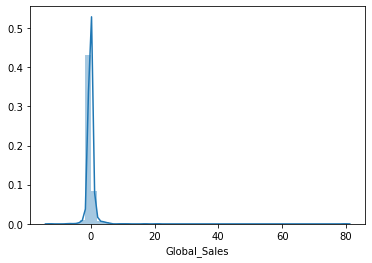

In [97]:
sns.distplot(y_test-rf_prediction)

In [122]:
# Maybe we need to remove some outlier data points....
save = (X_train, y_train, X_test, y_test)


In [126]:
from scipy import stats
test = df
test[np.abs(df.Global_Sales-df.Global_Sales.mean())<=(3*df.Global_Sales.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
test[~(np.abs(df.Global_Sales-df.Global_Sales.mean())>(3*df.Global_Sales.std()))] #or the other way around

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,Rating
152,3,2009.0,3,0,5.78,87.00,8.8,3
153,12,1996.0,9,3,5.74,89.00,8.9,2
154,9,2014.0,6,4,5.64,76.00,6.1,2
155,0,2007.0,8,18,5.64,80.00,8.9,3
156,3,2006.0,7,11,5.63,67.00,7.2,0
...,...,...,...,...,...,...,...,...
16701,19,2003.0,4,5,0.01,53.00,5.8,0
16702,3,2008.0,4,34,0.01,48.00,5.8,0
16706,14,2011.0,11,52,0.01,60.00,7.2,3
16709,14,2009.0,10,232,0.01,63.00,5.8,-1


In [127]:
# Split for random forest
df = test
rnd_state = 42
ratio = 0.2 # test/num_samples
#####
num_instances, _ = df.shape
print(f"From {num_instances} using {num_instances*ratio:.0f} for testing and {num_instances*(1-ratio):.0f} for training. Ratio = {ratio*100:.2f}%")
X, y = (df.drop(['Global_Sales'], axis=1), df.Global_Sales)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = ratio, random_state = rnd_state)
display(X_train)

From 9197 using 1839 for testing and 7358 for training. Ratio = 20.00%


,Platform,Year_of_Release,Genre,Publisher,Critic_Score,User_Score,Rating
7493,19,2005.0,9,10,48.00,6.60,2
5602,19,2003.0,8,5,92.00,8.40,2
8315,0,2007.0,8,152,77.00,7.40,0
15435,8,2002.0,0,52,62.00,62.86,0
6349,6,2000.0,2,25,77.00,6.00,0
...,...,...,...,...,...,...,...
8973,6,2002.0,0,30,54.00,4.60,1
8048,6,2009.0,8,4,7.66,6.80,2
8370,14,2013.0,8,19,78.00,8.10,3
1253,5,2011.0,3,25,85.00,8.60,3


In [128]:
from numpy import sqrt
num_features = X_train.shape[1]
print(num_features)
sqrt_num_features = round(sqrt(num_features), 0)
sqrt_num_features

7


3.0

In [129]:
# Let's play around with some settings
n_cores = 4
number_of_trees = 1000 # default = 100
rf2 = RandomForestRegressor(n_jobs=n_cores, n_estimators=number_of_trees, max_features='auto', bootstrap=True) #, verbose=1)

rf2.fit(X_train, y_train)
print("Before:")
display(rf1_scores)#
print("Now:")
rf2_scores = print_score(rf2, X_train, X_test, y_train, y_test)

Before:


{'RMS(train)': 0.4525472881618064,
 'RMS(valid)': 2.2072599128940444,
 'R²(train)': 0.907796260314278,
 'R²(valid)': 0.17622042009926764}

Now:


{'RMS(train)': 0.4319835700831242,
 'RMS(valid)': 2.186432115577106,
 'R²(train)': 0.9159853425456844,
 'R²(valid)': 0.19169350916505234}

In [130]:
print("Feature importance")
print_RF_featureImportance(rf2, X_train, col_dict)

Feature importance
Platform: 0.15360		... 
Year_of_Release: 0.09454		... 
Genre: 0.12755		... 
Publisher: 0.13913		... 
Critic_Score: 0.27745		... aggregated score given by videogame critics/journalists
User_Score: 0.15997		... aggregated score given by metacritic users
Rating: 0.04777		... (Recommended minimum) age rating
+-----------------+--------+---------------------------------------------------------+
|     Feature     | Score  |                         Comment                         |
+-----------------+--------+---------------------------------------------------------+
|     Platform    | 0.1536 |                                                         |
| Year_of_Release | 0.0945 |                                                         |
|      Genre      | 0.1275 |                                                         |
|    Publisher    | 0.1391 |                                                         |
|   Critic_Score  | 0.2775 | aggregated score given by videogame c

In [131]:
rf2_prediction = rf2.predict(X_test)

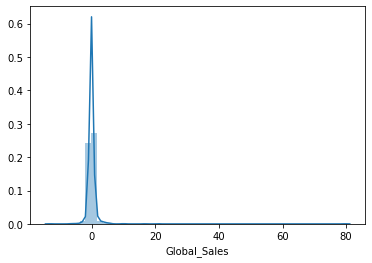

In [132]:
sns.distplot(y_test-rf2_prediction)

# Optimize Hyperparameters via GridSearch

because we lazy bois

## Notes on the RandomForestRegressor from scikit-learn
-----
The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.

## Number of variables/features per tree --> 'max_features'

A good starting point is/might be: *the square root of the number of features presented to the tree*. Then, test some values below and above that starting point.

## Number of trees in the forest --> 'n_estimators'

The more the merrier

In [133]:
from sklearn.model_selection import GridSearchCV
n_cores = 4
# but since we dont have that many features...we are just gonna brute force it :D
param_grid = [
    {
        'n_estimators': [3, 10, 30, 100, 500], 'max_features': [i for i in range(num_features-1,num_features+2)]
    }
#,{'bootstrap': [False], 'n_estimators': [3, 30, 100, 1000], 'max_features': [2, 3, 4]},
]
k = 10
forest_reg = RandomForestRegressor(n_jobs=n_cores)
grid_search = GridSearchCV(forest_reg, param_grid, n_jobs=n_cores , cv=k, return_train_score=True)#scoring='neg_mean_squared_error', 
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=4,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [134]:
print_GridSearchResult(grid_search)
scores = grid_search.score(X_test, y_test)
print_score(grid_search, X_train, X_test, y_train, y_test)

{'max_features': 6, 'n_estimators': 500}
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


{'RMS(train)': 0.43188032131924764,
 'RMS(valid)': 2.1838500561748453,
 'R²(train)': 0.9160254985770305,
 'R²(valid)': 0.1936015153507431}

{'RMS(train)': 0.43188032131924764,
 'RMS(valid)': 2.1838500561748453,
 'R²(train)': 0.9160254985770305,
 'R²(valid)': 0.1936015153507431}

# k-fold cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

def display_scores(scores):
    print("Scores:", scores)
    table = PrettyTable()
    table.field_names = ['Run', 'Score']
    for i, score in enumerate(scores):
        table.add_row([i, round(score, 3)])
    print(table)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [ ]:
k = 5
model = rf_RD
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=k)

In [ ]:
display_scores(rf_rmse_scores)

<a id='eval'></a>

# 3) Evaluation

# a) Linear Regression

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_lin_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_lin_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_lin_pred)))

In [ ]:
sns.distplot(Y_train)
sns.distplot(Y_lin_pred)

# b) Lasso Regression

In [ ]:
sns.distplot(Y_train)
sns.distplot(Y_lasso_pred)

In [ ]:
# geht leider noch nicht die dimesionen passen nicht zusammen
#print('Mean Absolute Error:', metrics.mean_absolute_error(Y_train, Y_lasso_pred))  
#print('Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_lasso_pred))  
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_lasso_pred)))

# Save model and DF

In [ ]:
# Dump model
import joblib
import os

os.makedirs('tmp', exist_ok=True)
joblib.dump(rf_RD, "tmp/rf_RD.pkl")
# To load the model
# my_model_loaded = joblib.load("my_model.pkl")

In [ ]:
import os
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')
df_raw = pd.read_feather('tmp/raw')